In [17]:
import pandas as pd

# Load CSV data
file_path = 'csv/trippub.csv'
data = pd.read_csv(file_path)

#REFRENCE CODES: https://nhts.ornl.gov/assets/2017/doc/codebook_v1.2.pdf


# Display basic information about the dataset
print("Number of rows and columns:", data.shape)

Number of rows and columns: (923572, 115)


In [18]:
# Display the first 50 columns
print("First 50 columns:", data.columns[:50])

# Display the next 50 columns
print("\nNext 50 columns:", data.columns[50:100])

# Display the remaining columns
print("\nRemaining columns:", data.columns[100:])

First 50 columns: Index(['HOUSEID', 'PERSONID', 'TDTRPNUM', 'STRTTIME', 'ENDTIME', 'TRVLCMIN',
       'TRPMILES', 'TRPTRANS', 'TRPACCMP', 'TRPHHACC', 'VEHID', 'TRWAITTM',
       'NUMTRANS', 'TRACCTM', 'DROP_PRK', 'TREGRTM', 'WHODROVE', 'WHYFROM',
       'LOOP_TRIP', 'TRPHHVEH', 'HHMEMDRV', 'HH_ONTD', 'NONHHCNT', 'NUMONTRP',
       'PSGR_FLG', 'PUBTRANS', 'TRIPPURP', 'DWELTIME', 'TDWKND', 'VMT_MILE',
       'DRVR_FLG', 'WHYTRP1S', 'ONTD_P1', 'ONTD_P2', 'ONTD_P3', 'ONTD_P4',
       'ONTD_P5', 'ONTD_P6', 'ONTD_P7', 'ONTD_P8', 'ONTD_P9', 'ONTD_P10',
       'ONTD_P11', 'ONTD_P12', 'ONTD_P13', 'TDCASEID', 'TRACC_WLK',
       'TRACC_POV', 'TRACC_BUS', 'TRACC_CRL'],
      dtype='object')

Next 50 columns: Index(['TRACC_SUB', 'TRACC_OTH', 'TREGR_WLK', 'TREGR_POV', 'TREGR_BUS',
       'TREGR_CRL', 'TREGR_SUB', 'TREGR_OTH', 'WHYTO', 'TRAVDAY', 'HOMEOWN',
       'HHSIZE', 'HHVEHCNT', 'HHFAMINC', 'DRVRCNT', 'HHSTATE', 'HHSTFIPS',
       'NUMADLT', 'WRKCOUNT', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACA

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print("\nHead of data", data.head())


Head of data     HOUSEID  TRAVDAY  SAMPSTRAT  HOMEOWN  HHSIZE  HHVEHCNT  HHFAMINC  PC  SPHONE  TAB  WALK  BIKE  CAR  TAXI  BUS  TRAIN  PARA  PRICE  PLACE  WALK2SAVE  BIKE2SAVE  PTRANS  HHRELATD  DRVRCNT  CNTTDHH HHSTATE  HHSTFIPS  NUMADLT  YOUNGCHILD  WRKCOUNT  TDAYDATE  HHRESP  LIF_CYC  MSACAT  MSASIZE  RAIL  URBAN  URBANSIZE  URBRUR  SCRESP  CENSUS_D  CENSUS_R  CDIVMSAR  HH_RACE  HH_HISP HH_CBSA  RESP_CNT  WEBUSE17  SMPLSRCE     WTHHFIN HBHUR  HTHTNRNT  HTPPOPDN  HTRESDN  HTEEMPDN  HBHTNRNT  HBPPOPDN  HBRESDN
0  30000007        2          3        1       3         5         7   2       1    2     5     5    1     5    4      5     5      1      2          4          4       4         1        3        6      NC        37        3           0         1    201608       1       10       3        1     2      1          1       1       1         5         3        53        2        2   XXXXX         3         1         2  187.314320     T        50      1500      750       750        

In [30]:
import matplotlib.pyplot as plt


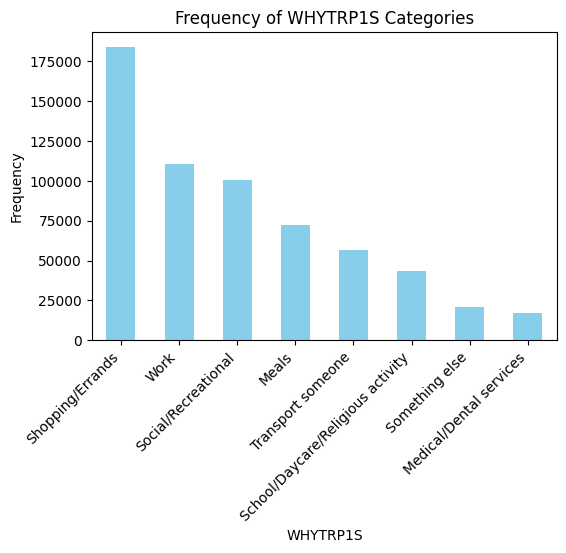

In [43]:
#Visualization and examination of target features
# whytrip1s = data['WHYTRP1S'].value_counts()
whytrip1s_map_to_string = {
    '01':'Home', 
    '10':'Work', 
    '20':'School/Daycare/Religious activity',
    '30':'Medical/Dental services',
    '40':'Shopping/Errands',
    '50':'Social/Recreational',
    '70':'Transport someone',
    '80':'Meals',
    '97':'Something else'
}
whytrip1s = data['WHYTRP1S'].astype(str).map(whytrip1s_map_to_string).value_counts()

# print(whytrip1s)
plt.figure(figsize=(6, 4))
whytrip1s.plot(kind='bar', color='skyblue')
plt.title('Frequency of WHYTRP1S Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [58]:
#Columns to be dropped: WHYTO, WHYFROM, TRIPPURP, WHYTRP1S, WHYTRP90
columns_to_drop = ['WHYTO', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTRP90']

# Separate features and target variable
target_var = 'WHYTRP1S'

X = data.drop(columns=columns_to_drop)
y = data[target_var]

print(X.columns)
print(y)


Index(['HOUSEID', 'PERSONID', 'TDTRPNUM', 'STRTTIME', 'ENDTIME', 'TRVLCMIN',
       'TRPMILES', 'TRPTRANS', 'TRPACCMP', 'TRPHHACC',
       ...
       'OBHTNRNT', 'OBPPOPDN', 'OBRESDN', 'DTHTNRNT', 'DTPPOPDN', 'DTRESDN',
       'DTEEMPDN', 'DBHTNRNT', 'DBPPOPDN', 'DBRESDN'],
      dtype='object', length=110)
0         20
1          1
2          1
3         10
4         20
          ..
923567    10
923568    50
923569    10
923570    40
923571     1
Name: WHYTRP1S, Length: 923572, dtype: int64


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [62]:
print(sum(data.isnull().sum()))


0


In [63]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923572 entries, 0 to 923571
Columns: 115 entries, HOUSEID to DBRESDN
dtypes: float64(5), int64(105), object(5)
memory usage: 810.3+ MB
None


In [66]:

# Identify and encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# for column in categorical_columns:
#     print(column, X[column].unique())
X_clean = X.drop(columns=categorical_columns)
# X_enc = pd.get_dummies(data, columns=categorical_columns)

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

# # Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [68]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': X_clean.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
      Feature    Importance
25  DWELTIME  2.042116e-01
3   STRTTIME  4.934196e-02
4    ENDTIME  4.750692e-02
2   TDTRPNUM  3.336089e-02
6   TRPMILES  2.484359e-02
..       ...           ...
14  DROP_PRK  3.083352e-05
38  ONTD_P10  2.340308e-05
39  ONTD_P11  3.458490e-06
40  ONTD_P12  1.414914e-06
41  ONTD_P13  2.148349e-07

[106 rows x 2 columns]


In [71]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7076685705005008


In [70]:
# Use Recursive Feature Elimination (RFE) to select important features MAY BE GOOD TO FIND BEST FEATURES FOR LINEAR REGRESSION?
rfe = RFE(estimator=rf_model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_clean, y)
selected_features = X_clean.columns[rfe.support_]
print("\nSelected Features (RFE):\n", selected_features)

KeyboardInterrupt: 